# PLN - Modelo de processo de linguagêm natural
**Análise de sentimento tweets**

In [1]:
from platform import python_version

print('Versão Jupyter Notebook neste projeto:', python_version())

Versão Jupyter Notebook neste projeto: 3.7.4


In [2]:
import nltk
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [3]:
%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

seaborn   : 0.9.0
sys       : 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
re        : 2.2.1
nltk      : 3.4.5
pandas    : 1.1.3
matplotlib: 3.1.1



In [4]:
plt.style.use('seaborn-darkgrid')
sns.set_style("whitegrid")
rcParams['figure.figsize'] = 12, 8

In [5]:
dados = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = 'latin', header=None)
dados

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
dados.head(5)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
dados.tail()

,0,1,2,3,4,5
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [8]:
dados.shape

(1600000, 6)

In [9]:
dados.dtypes

0     int64
1     int64
2    object
3    object
4    object
5    object
dtype: object

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [11]:
dados.columns = [
                "Polaridade",
                "Ids",
                "Data",
                "Flag",
                "Usuário",
                "Texto"
                ]

dados.head(5)

,Polaridade,Ids,Data,Flag,Usuário,Texto
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [12]:
dados.corr()

,Polaridade,Ids
Polaridade,1.000000,-0.261601
Ids,-0.261601,1.000000


In [13]:
dados.describe()

,Polaridade,Ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [14]:
dados.value_counts()

Polaridade  Ids         Data                          Flag      Usuário          Texto                                                                                                              
4           2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY  RyanTrevMorris   happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H                                                          1
0           2197107207  Tue Jun 16 13:21:06 PDT 2009  NO_QUERY  EddieHdz         In North Hollywood surviving  the flaming sun!!!                                                                       1
            2197102368  Tue Jun 16 13:20:42 PDT 2009  NO_QUERY  tk4257           I tried to tell my friends, but they thought it was a joke  â« http://blip.fm/~8c88g                                  1
            2197102502  Tue Jun 16 13:20:43 PDT 2009  NO_QUERY  Papps93          @Barber_21  i've never ever played an instrument  and yeah if ure ever in this part of the world... say hi!         

In [15]:
dados.Polaridade

0          0
1          0
2          0
3          0
4          0
          ..
1599995    4
1599996    4
1599997    4
1599998    4
1599999    4
Name: Polaridade, Length: 1600000, dtype: int64

In [16]:
dados.Polaridade.value_counts()

4    800000
0    800000
Name: Polaridade, dtype: int64

**Analise de dados**

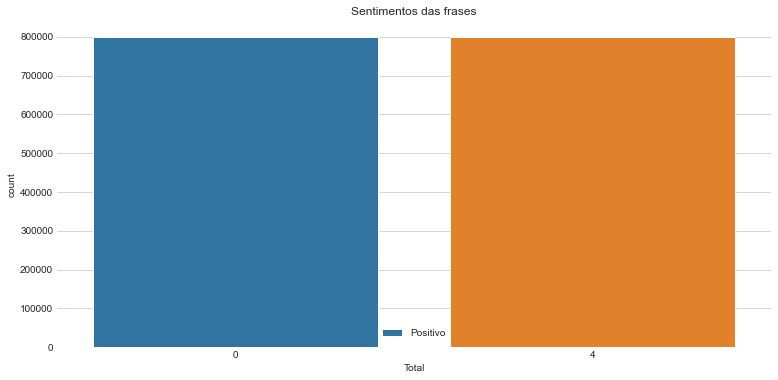

In [17]:
plt.figure(figsize=(12.8,6))

ax = sns.countplot(dados["Polaridade"]);
plt.title("Sentimentos das frases")
plt.legend(["Positivo", "Negativos"])
plt.xlabel("Total")
plt.show()

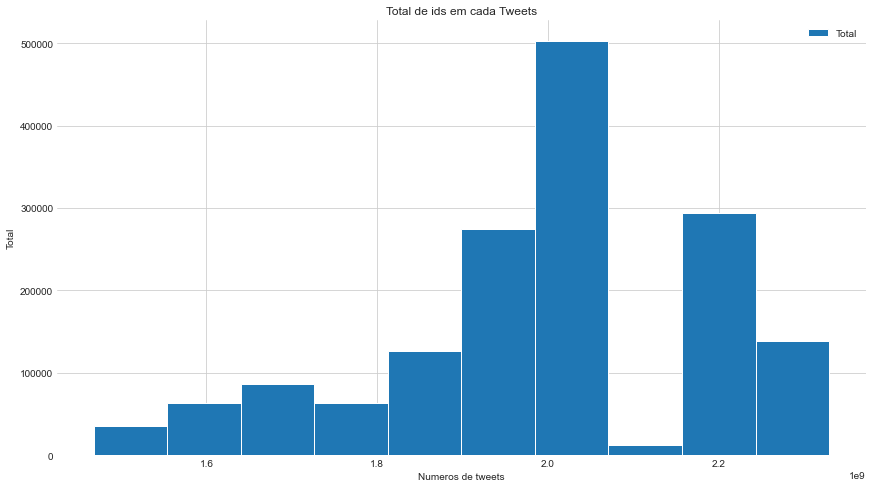

In [18]:
plt.figure(figsize=(14.5, 8))

plt.title("Total de ids em cada Tweets")
plt.hist(dados["Ids"]);
plt.xlabel("Numeros de tweets")
plt.ylabel("Total")
plt.legend(["Total"])

# Pré - processamento dos dados

In [19]:
dados.Texto.count()

1600000

In [20]:
# Dados duplicados

dados.drop_duplicates(["Texto"], inplace = True)
dados.Texto.count()

1581466

In [21]:
train = dados["Texto"]
test = dados["Polaridade"]

In [22]:
train.shape

(1581466,)

In [23]:
test.shape

(1581466,)

In [24]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    
    palavras = []
    
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

def Limpeza_dados(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

def Lemmatization(instancia):
    palavras = []
    for w in instancia.split():
        palavras.append(wordnet_lemmatizer.lemmatize(w))
        return (" ".join(palavras))

def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))


In [25]:
train = [Preprocessing(i) for i in train]
train[:20]

["@switchfoot awww, that's bummer you shoulda got david carr of third day to it d",
 "is upset that he can't update his facebook by texting it and might cry result school today also blah!",
 '@kenichan i dived many times the ball managed to save 50% the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 "@nationwideclass no, it's not behaving at all i'm mad why am i here? because i can't see you all over there",
 '@kwesidei not the whole crew',
 'need hug',
 "@loltrish hey long time see! yes rains bit ,only bit lol , i'm fine thanks , how's you ?",
 "@tatiana_k nope they didn't have it",
 '@twittera muera ?',
 "spring break in plain city it's snowing",
 'i just repierced my ears',
 "@caregiving i couldn't bear to watch it and i thought the ua loss was embarrassing",
 '@octolinz16 it it counts, idk why i did either you never talk to anymore',
 "@smarrison i would've been the first, but i didn't have gun not really though, zac snyder's just doucheclown",
 '@iamja

In [26]:
train[:10]

["@switchfoot awww, that's bummer you shoulda got david carr of third day to it d",
 "is upset that he can't update his facebook by texting it and might cry result school today also blah!",
 '@kenichan i dived many times the ball managed to save 50% the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 "@nationwideclass no, it's not behaving at all i'm mad why am i here? because i can't see you all over there",
 '@kwesidei not the whole crew',
 'need hug',
 "@loltrish hey long time see! yes rains bit ,only bit lol , i'm fine thanks , how's you ?",
 "@tatiana_k nope they didn't have it",
 '@twittera muera ?']

In [27]:
from nltk.tokenize import word_tokenize

frase = "Hoje passei no concursso de ti"

word_tokenize(frase)

['Hoje', 'passei', 'no', 'concursso', 'de', 'ti']

In [28]:
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()
tweet_tokenizer.tokenize(frase)

['Hoje', 'passei', 'no', 'concursso', 'de', 'ti']

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)
freq_tweets = vectorizer.fit_transform(train)
freq_tweets.shape

(1581466, 766139)

# Modelo 1 - Machine learning
**Regressão Logistica**

In [30]:
from sklearn.linear_model import LogisticRegression

model_logist_regression = LogisticRegression()
model_regression_logistic_fit = model_logist_regression.fit(freq_tweets, test)
model_regression_logistic_scor = model_logist_regression.score(freq_tweets, test)
print("Model - Logistic Regression: %.2f" % (model_regression_logistic_scor * 100))

C:\Users\RafaelHenriqueGallo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
Model - Logistic Regression: 80.43


In [31]:
model_logist_regression_prob = model_logist_regression.predict_log_proba(freq_tweets)
model_logist_regression_prob

array([[-0.0099462 , -4.61553336],
       [-0.01682055, -4.09355228],
       [-0.74643739, -0.64255371],
       ...,
       [-3.12995167, -0.04470443],
       [-0.78639847, -0.60785479],
       [-2.05163077, -0.13756826]])

## Modelo 2 - Machine learning 
**Naive bayes**

In [32]:
from sklearn.naive_bayes import MultinomialNB

modelo = MultinomialNB()
modelo.fit(freq_tweets, test)
mode_by_pred = modelo.predict_proba(freq_tweets).round(2)
mode_by_pred

array([[0.89, 0.11],
       [1.  , 0.  ],
       [0.92, 0.08],
       ...,
       [0.03, 0.97],
       [0.22, 0.78],
       [0.  , 1.  ]])

In [33]:
def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    
    resultado = []
    palavras = texto.split()
    
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    
    return (" ".join(resultado))

In [34]:
from sklearn.pipeline import Pipeline

pipeline_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
])
pipeline_simples.fit(train, test)


pipeline_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', MultinomialNB())
])
pipeline_negacoes.fit(train, test)

Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x00000291D2EB8CA8>)),
                ('classifier', MultinomialNB())])

In [35]:
from sklearn import svm

pipeline_svm_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', svm.SVC(kernel='linear'))
])

pipeline_svm_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', svm.SVC(kernel='linear'))
])

In [36]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

resultados = cross_val_predict(pipeline_simples, train, test, cv=10)
accuracy = metrics.accuracy_score(test,resultados)
print("Accuracy Model: %.2f" % (accuracy * 100))

Accuracy Model: 77.04


In [37]:
sentimento=['Positivo',
            'Negativo',
            'Neutro']

print (pd.crosstab(test, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito       0       4      All
Real                            
0        635009  155176   790185
4        207968  583313   791281
All      842977  738489  1581466


In [38]:
def Metricas(modelo, tweets, classes):
    resultados = cross_val_predict(modelo, train, test, cv=10)
    return 'Acurácia do modelo: {}'.format(metrics.accuracy_score(classes,resultados))

Metricas(pipeline_simples,train,test)

'Acurácia do modelo: 0.7703750823602911'

In [39]:
#Metricas(pipeline_svm_negacoes,train,test)